In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("/home/devjith/Luminar/Machine Learning/files/Iris_missingdata.csv")

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,NaN,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,NaN,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.isna().sum()

Id                0
SepalLengthCm    11
SepalWidthCm      7
PetalLengthCm     8
PetalWidthCm      9
Species           0
dtype: int64

In [7]:
df['SepalLengthCm'].unique()

array([5.1       , 4.9       , 4.7       , 5.84172662, 5.        ,
       5.4       , 4.6       , 4.4       , 4.8       , 5.8       ,
       5.7       , 5.2       , 5.5       , 4.5       , 5.3       ,
       7.        , 6.9       , 6.5       , 6.3       , 6.6       ,
       5.9       , 6.        , 6.1       , 5.6       , 6.7       ,
       6.2       , 6.8       , 7.1       , 7.6       , 7.3       ,
       7.2       , 6.4       , 7.7       , 7.9       ])

In [9]:
df['SepalLengthCm'] = df['SepalLengthCm'].fillna(df['SepalLengthCm'].mean())

In [12]:
df['SepalWidthCm'].unique()

array([3.5       , 3.        , 3.2       , 3.1       , 3.6       ,
       3.9       , 3.4       , 2.9       , 3.7       , 3.05034965,
       4.4       , 3.8       , 3.3       , 4.1       , 4.2       ,
       2.3       , 2.8       , 2.4       , 2.7       , 2.        ,
       2.2       , 2.5       , 2.6       ])

In [11]:
df['SepalWidthCm'] = df['SepalWidthCm'].fillna(df['SepalWidthCm'].mean())

In [15]:
df['PetalLengthCm'].unique()

array([1.4       , 1.3       , 1.5       , 1.7       , 3.78028169,
       1.6       , 1.1       , 1.2       , 1.        , 1.9       ,
       4.7       , 4.5       , 4.9       , 4.        , 4.6       ,
       3.3       , 3.9       , 3.5       , 4.2       , 3.6       ,
       4.4       , 4.1       , 4.8       , 4.3       , 5.        ,
       3.8       , 3.7       , 5.1       , 3.        , 6.        ,
       5.9       , 5.6       , 5.8       , 6.6       , 6.3       ,
       6.1       , 5.3       , 5.5       , 6.7       , 6.9       ,
       5.7       , 6.4       , 5.4       , 5.2       ])

In [14]:
df['PetalLengthCm'] = df['PetalLengthCm'].fillna(df['PetalLengthCm'].mean())

In [18]:
df['PetalWidthCm'].unique()

array([0.2       , 0.4       , 0.3       , 0.1       , 0.5       ,
       1.19858156, 0.6       , 1.4       , 1.5       , 1.3       ,
       1.6       , 1.        , 1.1       , 1.8       , 1.2       ,
       1.7       , 2.5       , 1.9       , 2.1       , 2.2       ,
       2.        , 2.4       , 2.3       ])

In [17]:
df['PetalWidthCm'] = df['PetalWidthCm'].fillna(df['PetalWidthCm'].mean())

In [19]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [22]:
x = df.iloc[:,1:-1].values

In [23]:
y = df.iloc[:,-1].values

In [24]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

model_naive = GaussianNB()
model_knn = KNeighborsClassifier()
model_svm = SVC()


model_naive.fit(x_train,y_train)
model_knn.fit(x_train,y_train)
model_svm.fit(x_train,y_train)





,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [37]:
y_naive = model_naive.predict(x_test)
y_knn = model_knn.predict(x_test)
y_svm = model_svm.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix

naive_accuracy = accuracy_score(y_test,y_naive)
knn_accuracy = accuracy_score(y_test,y_knn)
svm_sccuracy = accuracy_score(y_test,y_svm)

print(f"Naive bayes accuracy is{naive_accuracy * 100:.2f} \n knn accuracy is {knn_accuracy * 100:.2f} \n svm accuracy is {svm_sccuracy * 100:.2f}")

Naive bayes accuracy is93.33 
 knn accuracy is 91.11 
 svm accuracy is 95.56


In [33]:
naive_cm = confusion_matrix(y_test,y_naive)
knn__cm = confusion_matrix(y_test,y_knn)
svm_cm = confusion_matrix(y_test,y_svm)

In [34]:
naive_cm,knn__cm,svm_cm

(array([[14,  0,  0],
        [ 0, 16,  2],
        [ 0,  1, 12]]),
 array([[13,  1,  0],
        [ 0, 17,  1],
        [ 0,  1, 12]]),
 array([[13,  1,  0],
        [ 0, 17,  1],
        [ 0,  1, 12]]))

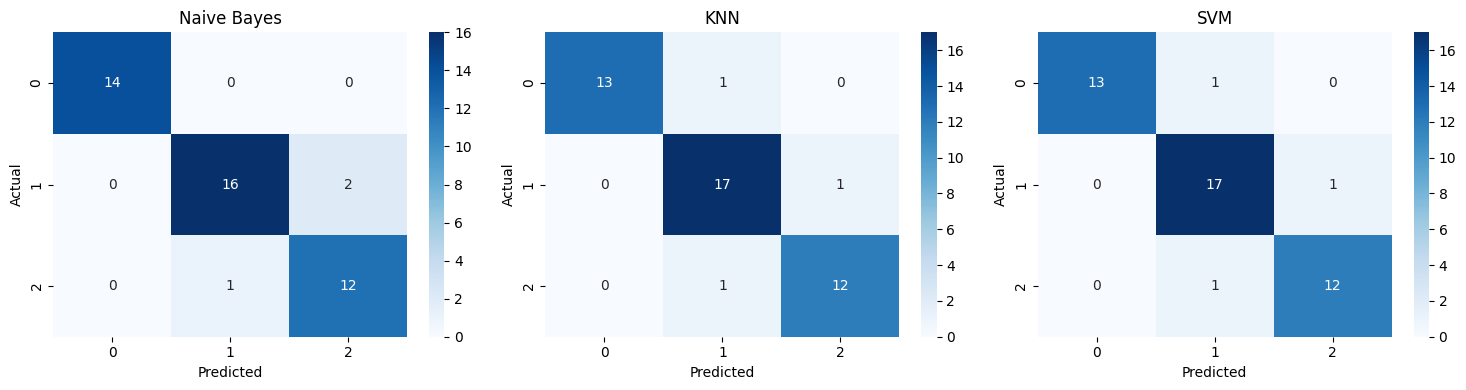

In [39]:
import seaborn as sns

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.heatmap(naive_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Naive Bayes')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(knn__cm, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('KNN')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('SVM')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()